In [6]:
import pandas as pd
import shapely
from shapely.geometry import Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt


#xi number of cahrging stations ti install on piint i

excel_data_df = pd.read_excel('Demand_data.xlsx')
excel_data_df=excel_data_df.dropna()

c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[Text(0.5, 1.0, 'Number of Potential Locations')]

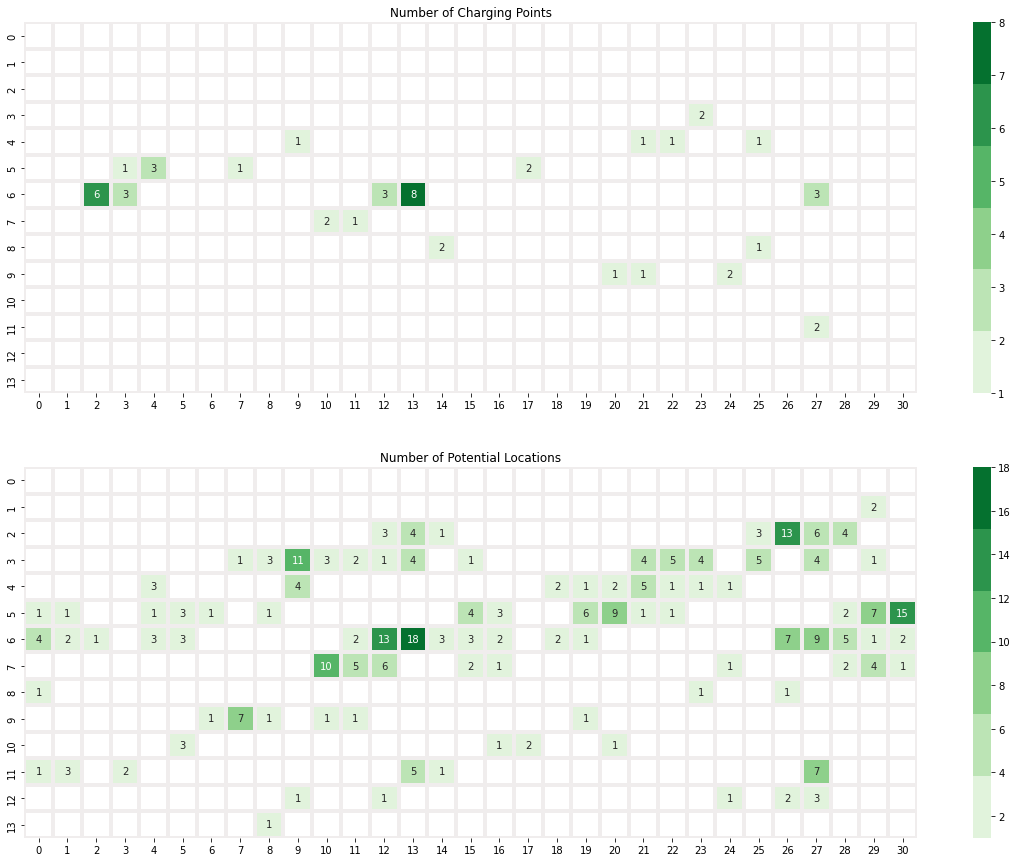

In [7]:
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

#####################################################################
#Create array of 14x31 and fill it with Number of Potential Locations
Index= [i for i in range(14)]
Cols = [i for i in range(31)]
alist=excel_data_df['Number of Charging Points']
alist= pd.Series(alist).values
alist = alist.reshape(14,31)
#Put it into a DF
ncp_df = DataFrame(alist,index=Index, columns=Cols)
ncp_values = ncp_df.to_numpy(dtype=float)


#####################################################################
#Create array of 14x31 and fill it with Number of Potential Locations
Index= [i for i in range(14)]
Cols = [i for i in range(31)]
alist=excel_data_df['Number of Potential Locations']
alist= pd.Series(alist).values
alist = alist.reshape(14,31)
#Put it into a DF
npl_df = DataFrame(alist,index=Index, columns=Cols)
npl_values = npl_df.to_numpy(dtype=float)


#####################################################################
fig, ax =plt.subplots(2,1, figsize=(20, 15))
colormap = sns.color_palette("Greens")
sns.heatmap(ncp_df, annot=True, cmap=colormap, ax=ax[0], mask=ncp_values == 0, linewidths=4, linecolor='#f0eded').set(title='Number of Charging Points')
sns.heatmap(npl_df, annot=True, cmap=colormap, ax=ax[1], mask=npl_values == 0, linewidths=4, linecolor='#f0eded').set(title='Number of Potential Locations')


<AxesSubplot: >

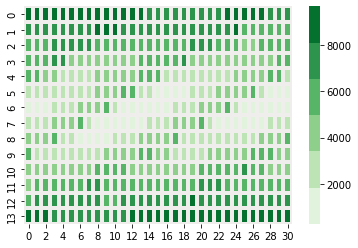

In [8]:
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

#####################################################################
#Create array of 14x31 and fill it with Number of Potential Locations
Index= [i for i in range(14)]
Cols = [i for i in range(31)]
alist=excel_data_df['Distance from Centre']
alist= pd.Series(alist).values
alist = alist.reshape(14,31)
#Put it into a DF
dfc_df = DataFrame(alist,index=Index, columns=Cols)
dfc_values = dfc_df.to_numpy(dtype=float)

#####################################################################

sns.heatmap(dfc_df, annot=False, cmap=colormap, linewidths=4, linecolor='#f0eded')


________________________________________________

In [9]:
excel_data_df['geometry'] = excel_data_df['geometry'].apply(wkt.loads)


In [10]:
# excel_data_df['geometry']
#excel_data_df.dtypes

df2 = excel_data_df.loc[:,'geometry']
df2
myPoly = gpd.GeoSeries(df2)
myPoly
# plt.show()
# gdf = gpd.GeoDataFrame(df2, crs='epsg:4326')
# gdf.dtypes
# gdf['geometry'].plot()

0      POLYGON ((-3.10582 56.44297, -3.10596 56.44787...
1      POLYGON ((-3.10596 56.44787, -3.10610 56.45276...
2      POLYGON ((-3.10610 56.45276, -3.10625 56.45766...
3      POLYGON ((-3.10625 56.45766, -3.10639 56.46256...
4      POLYGON ((-3.10639 56.46256, -3.10653 56.46746...
                             ...                        
429    POLYGON ((-2.84151 56.48913, -2.84161 56.49403...
430    POLYGON ((-2.84161 56.49403, -2.84172 56.49893...
431    POLYGON ((-2.84172 56.49893, -2.84183 56.50383...
432    POLYGON ((-2.84183 56.50383, -2.84194 56.50873...
433    POLYGON ((-2.84194 56.50873, -2.84205 56.51362...
Name: geometry, Length: 434, dtype: geometry

In [11]:
import contextily as ctx
import matplotlib.colors as mcolors
import numpy as np

colors = [(1,0,0,c) for c in np.linspace(0,1,100)]
cmapred = mcolors.LinearSegmentedColormap.from_list('mycmap', colors, N=5)
colors = [(0,0,1,c) for c in np.linspace(0,1,100)]
cmapblue = mcolors.LinearSegmentedColormap.from_list('mycmap', colors, N=5)


------------------
AxesSubplot(0.125,0.353645;0.775x0.297709)
------------------


(-3.121621312895639, -2.81788119008772, 56.43943285837387, 56.51721884945166)

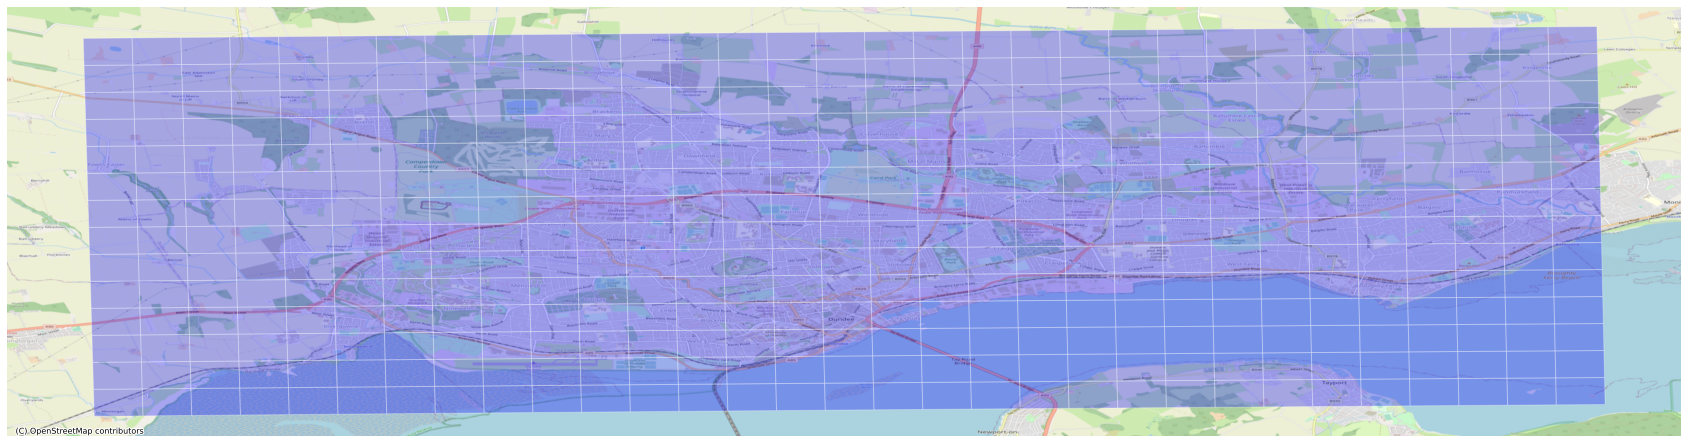

In [16]:
axes = myPoly.plot(figsize=(30,20), cmap=cmapblue, edgecolor='white', alpha=0.31)
print("------------------")
print(axes)
print("------------------")
ctx.add_basemap(axes, source=ctx.providers.OpenStreetMap.Mapnik,crs='EPSG:4326')
axes.axis('off')

In [ ]:
fig, ax = plt.subplots(figsize=(16, 16))
ax.axis(ghent_ext)
cx.add_basemap(ax)